# Classification : 2 Class

## 1.환경준비

### (1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Input
from keras.backend import clear_session
from keras.optimizers import Adam

* 학습곡선 함수

In [2]:
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

In [3]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.3.csv"
data = pd.read_csv(path)
data.drop(['Age_scale1', 'AgeGroup', 'SibSp','Parch' ], axis = 1, inplace = True)
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


## 2.데이터 준비

Sex, Age, Fare 만 이용하여 Survived 를 예측하는 모델을 만들어 봅시다.

### (1) 데이터 준비

In [4]:
target = 'Survived'
features = ['Sex', 'Age', 'Fare']
x = data.loc[:, features]
y = data.loc[:, target]

### (2) 가변수화

In [5]:
x = pd.get_dummies(x, columns = ['Sex'], drop_first = True)
x.head()

,Age,Fare,Sex_male
0,22.0,7.2500,True
1,38.0,71.2833,False
2,26.0,7.9250,False
3,35.0,53.1000,False
4,35.0,8.0500,True


### (3) 데이터분할

In [6]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.3, random_state = 20)

### (4) Scaling

In [7]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

## 3.딥러닝1: 3개 feature

### (1) 모델설계

In [8]:
nfeatures = x_train.shape[1]
nfeatures

3

In [9]:
# 메모리 정리
clear_session()

# Sequential 모델 만들기
model = Sequential( [Input(shape = (nfeatures,)),
                     Dense( 1, activation= 'sigmoid')])

# 모델요약
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

### (2) compile + 학습

In [10]:
model.compile(optimizer = Adam(learning_rate=0.01), loss = 'binary_crossentropy')

history = model.fit(x_train, y_train, epochs = 50, validation_split=0.2).history

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.6317 - val_loss: 0.6269
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.6142 - val_loss: 0.6124
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6087 - val_loss: 0.5987
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5934 - val_loss: 0.5857
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5827 - val_loss: 0.5754
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.5795 - val_loss: 0.5654
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5579 - val_loss: 0.5567
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.5842 - val_loss: 0.5492
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.5640 - val_loss: 0.5417
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5387 - val_loss: 0.5351
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5278 - val_loss: 0.5293
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5

* 학습결과 그래프

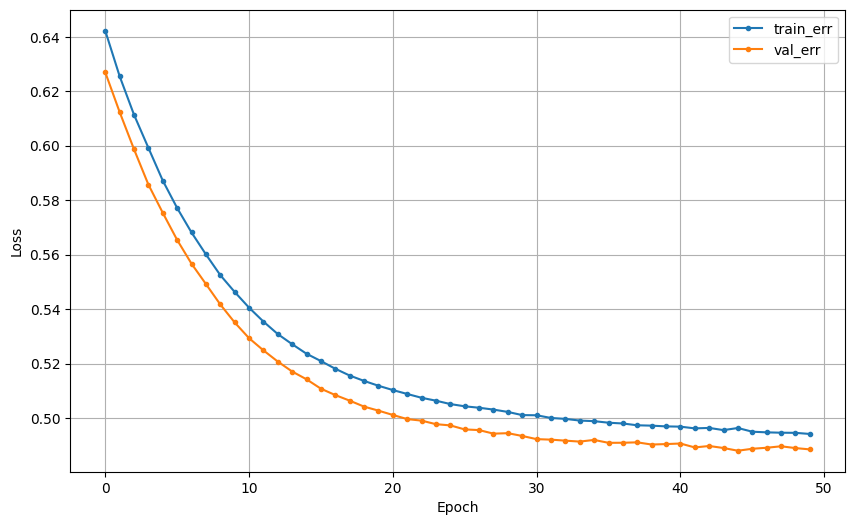

In [11]:
dl_history_plot(history)

### (3) 예측 및 검증

In [12]:
pred = model.predict(x_val)
# pred[:5]
# activation이 sigmoid --> 0 ~ 1 사이의 확률값.
# 그러므로 cut-off value(보통 0.5)를 기준으로 잘라서 0과 1로 만들어 준다.
pred = np.where(pred >= .5, 1, 0)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [13]:
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       170
           1       0.70      0.68      0.69        98

    accuracy                           0.78       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.78      0.78      0.78       268



## 4.딥러닝2 : 전체 feature
* 이제 전체 데이터를 가지고 모델링을 시도해 보겠습니다.


### (1) 데이터 전처리

* 데이터 준비

In [14]:
target = 'Survived'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

* 가변수화

In [15]:
cat_cols = ['Pclass','Sex', 'Embarked']
x = pd.get_dummies(x, columns = cat_cols, drop_first = True)

* 데이터분할

In [16]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.3, random_state = 20)

* 스케일링

In [17]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

* 모델 설계

In [18]:
nfeatures = x_train.shape[1]
nfeatures

8

In [23]:
# 메모리 정리
clear_session()

# Sequential 모델 만들기
model = Sequential( [Input(shape = (nfeatures,)),
                     Dense( 1, activation= 'sigmoid')])

# 모델요약
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

* compile + 학습

In [24]:
model.compile(optimizer = Adam(learning_rate=0.01), loss = 'binary_crossentropy')

history = model.fit(x_train, y_train, epochs = 50, validation_split=0.2).history

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.6186 - val_loss: 0.5988
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5939 - val_loss: 0.5717
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5555 - val_loss: 0.5523
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5455 - val_loss: 0.5376
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5394 - val_loss: 0.5273
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5445 - val_loss: 0.5151
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5270 - val_loss: 0.5079
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5193 - val_loss: 0.5005
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5090 - val_loss: 0.4947
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5153 - val_loss: 0.4901
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5023 - val_loss: 0.4854
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4836 - val_l

* 학습결과 그래프

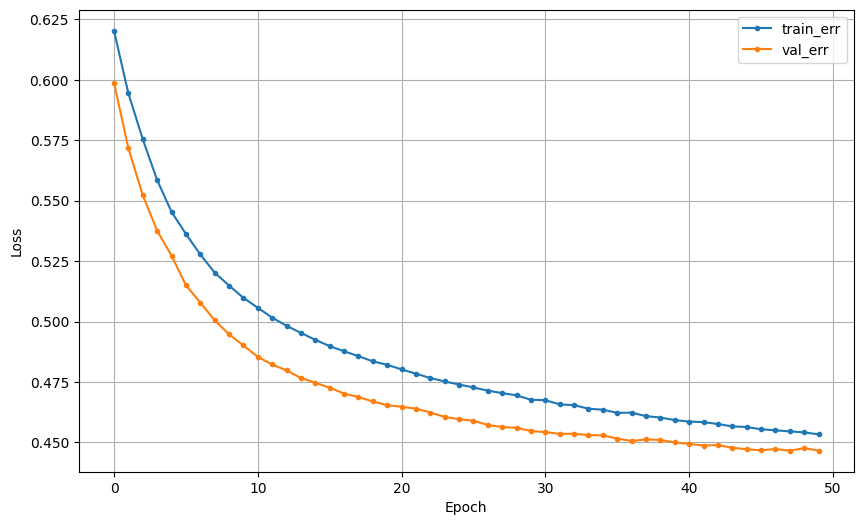

In [25]:
dl_history_plot(history)

* 예측 및 검증

In [26]:
pred = model.predict(x_val)
# pred[:5]
# activation이 sigmoid --> 0 ~ 1 사이의 확률값.
# 그러므로 cut-off value(보통 0.5)를 기준으로 잘라서 0과 1로 만들어 준다.
pred = np.where(pred >= .5, 1, 0)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


----

## 5.딥러닝3 : hidden layer
* 이제 레이어를 추가해 보겠습니다.


### (1) 모델 설계

In [19]:
n = x_train.shape[1]
n

8

In [20]:
# 메모리 정리
clear_session()

# Sequential 모델
model3 = Sequential([Input(shape = (n,)),
                     Dense( 4, activation = 'relu'),
                     Dense( 1, activation = 'sigmoid')])

# 모델요약
model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

### (2) compile + 학습

In [21]:
model3.compile( optimizer=Adam(learning_rate= 0.01), loss ='binary_crossentropy')
hist = model3.fit(x_train, y_train, epochs = 50, validation_split=.2 ).history

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.6929 - val_loss: 0.6312
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6140 - val_loss: 0.6053
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6063 - val_loss: 0.5866
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6055 - val_loss: 0.5658
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5790 - val_loss: 0.5504
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5542 - val_loss: 0.5360
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5772 - val_loss: 0.5245
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5082 - val_loss: 0.5125
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4846 - val_loss: 0.5029
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4694 - val_loss: 0.4954
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4553 - val_loss: 0.4895
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4780 - val_l

* 학습결과 그래프

In [ ]:
dl_history_plot(hist)

* 예측 및 검증

In [ ]:
pred3 = model3.predict(x_val)
pred3 = np.where(pred3 >= 0.5, 1, 0)

In [ ]:
print(classification_report(y_val, pred3))

### (3) 실습1

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | 옵션 |
| ---- | ---- | ---- |
| dense (Dense) | (None, 16)  | node, input_shape, activation = 'relu' |
| dense_1 (Dense) | (None, 1) | node, activation = 'sigmoid' |     

### (4) 실습2

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape |  옵션 |
| ---- | ---- | ---- |
| dense (Dense) | (None, 16) |  node, input_shape, activation = 'relu' |
| dense_1 (Dense) | (None, 8) |  node, activation = 'relu'  |
| dense_2 (Dense) | (None, 1) |  node, activation = 'sigmoid'  |

### (5) 실습3

* 이번에는 여러분이 원하는 대로 설계하고, 학습해 봅시다.
